# Competition overview

**Overview**

This academic project summarizes a machine learning competition focused on building a flight recommendation system for business travelers. The core problem is to predict which flight a business traveler will choose from a list of search results, a task that differs from leisure travel due to the complexity of a business traveler's decision-making process. These decisions are influenced by a combination of corporate policies, meeting schedules, expense compliance, and personal convenience.

**Competition Goal and Technical Challenge**

The primary goal is to solve a group-wise ranking problem. The model must analyze a set of flight options for a single user search session and rank them according to the likelihood of being chosen. The key technical challenge is the varying number of flight options per search session, which can range from a handful to thousands. This requires a model capable of effectively ranking a diverse and dynamic set of alternatives to accurately identify the most suitable option for each traveler.

**Evaluation and Submission**

The model's performance is evaluated using the HitRate@3 metric. This metric measures the percentage of search queries where the model's top three ranked predictions include the flight that was actually selected by the user. Importantly, this metric is only calculated on search groups containing more than 10 flight options, focusing the evaluation on the more challenging ranking scenarios.

The training data is provided as a binary classification problem, where a selected=1 flag identifies the chosen flight within each search session. For submission, the model's output (typically a score or probability) must be converted into a rank (1, 2, 3, etc.) for every flight option within each search session. These ranks must be a valid permutation of integers, ensuring each flight option receives a unique rank.

### [Competition Link](https://www.kaggle.com/competitions/aeroclub-recsys-2025/overview)

# Dataset Description

## Overview

This dataset provides information on flight booking options for business travelers, including user and company details, pricing, flight timing, and service characteristics. The primary goal is to predict user flight selection preferences by ranking flight options within a given search session.

## Data Structure

The dataset is structured around flight search sessions, where each session is identified by `ranker_id`. The main data is provided in `.parquet` format for training and testing, with additional raw JSON files available for feature engineering. The target variable, selected, is a binary indicator in the training data, marking the single flight option chosen by the user. The submission requires ranking all flight options for each session in the test set, with a rank of 1 indicating the most likely choice.

**Main Data**

- `train.parquet` - train data
- `test.parquet` - test data
- `sample_submission.parquet` - submission example

**JSONs Raw Additional Data**

- `jsons_raw.tar.kaggle` - Archived raw data in JSONs files (150K files, ~50GB). To use the file as a regular `.gz` archive you should manually change extension to '`.gz`'. Example `jsons_raw.tar.kaggle` -> `jsons_raw.tar.gz`
- `jsons_structure.md` - JSONs raw data structure description

## Data Dictionary

This data dictionary describes the columns found in the main dataset files (`train.parquet` and `test.parquet`). The data is organized into logical sections for clarity.

**Training Data Target**

In the training data, the selected column is binary:
- 1 = This flight was chosen by the traveler
- 0 = This flight was not chosen

**Important:** There is exactly one row with selected=1 per user search request (`ranker_id`). Each row within a `ranker_id` group represents a different flight option returned by the search system for that specific route and date.

**Training data example:**

<pre>
Id,ranker_id,selected
100,abc123,0     # Flight option 1 - not chosen
101,abc123,0     # Flight option 2 - not chosen  
102,abc123,1,    # Flight option 3 - SELECTED by user
103,abc123,0     # Flight option 4 - not chosen
</pre>

### Column Descriptions

**Identifiers and Metadata**

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-k9u1{border-color:inherit;color:#1B1C1D;font-size:100%;text-align:left;vertical-align:bottom}
.tg .tg-7zrl{text-align:left;vertical-align:bottom}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg"><thead>
  <tr>
    <th class="tg-k9u1">Column Name</th>
    <th class="tg-7zrl">Data Type</th>
    <th class="tg-7zrl">Description</th>
  </tr></thead>
<tbody>
  <tr>
    <td class="tg-7zrl">Id</td>
    <td class="tg-7zrl">int</td>
    <td class="tg-0lax">A unique identifier for each individual flight option.</td>
  </tr>
  <tr>
    <td class="tg-7zrl">ranker_id</td>
    <td class="tg-7zrl">object</td>
    <td class="tg-0lax">A group identifier for each flight search session. This is the key for grouping flight options.</td>
  </tr>
  <tr>
    <td class="tg-7zrl">profileId</td>
    <td class="tg-7zrl">object</td>
    <td class="tg-0lax">A unique identifier for the user.</td>
  </tr>
  <tr>
    <td class="tg-7zrl">companyID</td>
    <td class="tg-7zrl">object</td>
    <td class="tg-0lax">A unique identifier for the user's company.</td>
  </tr>
</tbody>
</table>

**User and Company Information**

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-k9u1{border-color:inherit;color:#1B1C1D;font-size:100%;text-align:left;vertical-align:bottom}
.tg .tg-7zrl{text-align:left;vertical-align:bottom}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg"><thead>
  <tr>
    <th class="tg-k9u1">Column Name</th>
    <th class="tg-7zrl">Data Type</th>
    <th class="tg-7zrl">Description</th>
  </tr></thead>
<tbody>
  <tr>
    <td class="tg-7zrl">sex</td>
    <td class="tg-7zrl">object</td>
    <td class="tg-0lax">The user's gender.</td>
  </tr>
  <tr>
    <td class="tg-7zrl">nationality</td>
    <td class="tg-7zrl">object</td>
    <td class="tg-0lax">The user's nationality or citizenship.</td>
  </tr>
  <tr>
    <td class="tg-7zrl">frequentFlyer</td>
    <td class="tg-7zrl">object</td>
    <td class="tg-0lax">The user's frequent flyer program status.</td>
  </tr>
  <tr>
    <td class="tg-7zrl">isVip</td>
    <td class="tg-7zrl">bool</td>
    <td class="tg-0lax">A binary indicator of whether the user has VIP status.</td>
  </tr>
  <tr>
    <td class="tg-7zrl">bySelf</td>
    <td class="tg-7zrl">bool</td>
    <td class="tg-0lax">A binary indicator of whether the user booked the flight independently.</td>
  </tr>
  <tr>
    <td class="tg-7zrl">isAccess3D</td>
    <td class="tg-7zrl">bool</td>
    <td class="tg-0lax">A binary marker for an internal feature.</td>
  </tr>
  <tr>
    <td class="tg-7zrl">corporateTariffCode</td>
    <td class="tg-7zrl">object</td>
    <td class="tg-0lax">The corporate tariff code associated with company travel policies.</td>
  </tr>
</tbody></table>

**Search and Pricing Information**

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-k9u1{border-color:inherit;color:#1B1C1D;font-size:100%;text-align:left;vertical-align:bottom}
.tg .tg-7zrl{text-align:left;vertical-align:bottom}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg"><thead>
  <tr>
    <th class="tg-k9u1">Column Name</th>
    <th class="tg-7zrl">Data Type</th>
    <th class="tg-7zrl">Description</th>
  </tr></thead>
<tbody>
  <tr>
    <td class="tg-7zrl">searchRoute</td>
    <td class="tg-7zrl">object</td>
    <td class="tg-0lax">The flight route, either a single direction or a round trip (separated by "/").</td>
  </tr>
  <tr>
    <td class="tg-7zrl">requestDate</td>
    <td class="tg-7zrl">datetime</td>
    <td class="tg-0lax">The date and time when the flight search was performed.</td>
  </tr>
  <tr>
    <td class="tg-7zrl">totalPrice</td>
    <td class="tg-7zrl">float</td>
    <td class="tg-0lax">The total cost of the flight ticket.</td>
  </tr>
  <tr>
    <td class="tg-7zrl">taxes</td>
    <td class="tg-7zrl">float</td>
    <td class="tg-0lax">The taxes and fees component of the ticket price.</td>
  </tr>
  <tr>
    <td class="tg-7zrl">pricingInfo_isAccessTP</td>
    <td class="tg-7zrl">bool</td>
    <td class="tg-0lax">A binary indicator of compliance with corporate travel policy.</td>
  </tr>
  <tr>
    <td class="tg-7zrl">pricingInfo_passengerCount</td>
    <td class="tg-7zrl">int</td>
    <td class="tg-0lax">The number of passengers for this booking option.</td>
  </tr>
</tbody></table>

**Flight Timing and Duration**

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-k9u1{border-color:inherit;color:#1B1C1D;font-size:100%;text-align:left;vertical-align:bottom}
.tg .tg-7zrl{text-align:left;vertical-align:bottom}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg"><thead>
  <tr>
    <th class="tg-k9u1">Column Name</th>
    <th class="tg-7zrl">Data Type</th>
    <th class="tg-7zrl">Description</th>
  </tr></thead>
<tbody>
  <tr>
    <td class="tg-7zrl">legs0_departureAt</td>
    <td class="tg-7zrl">datetime</td>
    <td class="tg-0lax">The departure time for the outbound flight.</td>
  </tr>
  <tr>
    <td class="tg-7zrl">legs0_arrivalAt</td>
    <td class="tg-7zrl">datetime</td>
    <td class="tg-0lax">The arrival time for the outbound flight.</td>
  </tr>
  <tr>
    <td class="tg-7zrl">legs0_duration</td>
    <td class="tg-7zrl">int</td>
    <td class="tg-0lax">The total duration of the outbound flight in minutes.</td>
  </tr>
  <tr>
    <td class="tg-7zrl">legs1_departureAt</td>
    <td class="tg-7zrl">datetime</td>
    <td class="tg-0lax">The departure time for the return flight.</td>
  </tr>
  <tr>
    <td class="tg-7zrl">legs1_arrivalAt</td>
    <td class="tg-7zrl">datetime</td>
    <td class="tg-0lax">The arrival time for the return flight.</td>
  </tr>
  <tr>
    <td class="tg-7zrl">legs1_duration</td>
    <td class="tg-7zrl">int</td>
    <td class="tg-0lax">The total duration of the return flight in minutes.</td>
  </tr>
</tbody></table>

**Flight Segments (Example for Leg 0, Segment 0)**

Note: This structure is repeated for each leg (`legs0, legs1`) and each segment (`segments0 through segments3`).

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-k9u1{border-color:inherit;color:#1B1C1D;font-size:100%;text-align:left;vertical-align:bottom}
.tg .tg-7zrl{text-align:left;vertical-align:bottom}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg"><thead>
  <tr>
    <th class="tg-k9u1">Column Name</th>
    <th class="tg-7zrl">Data Type</th>
    <th class="tg-7zrl">Description</th>
  </tr></thead>
<tbody>
  <tr>
    <td class="tg-7zrl">legs0_segments0_departureFrom_airport_iata</td>
    <td class="tg-7zrl">object</td>
    <td class="tg-0lax">The IATA code for the departure airport of the first segment.</td>
  </tr>
  <tr>
    <td class="tg-7zrl">legs0_segments0_arrivalTo_airport_iata</td>
    <td class="tg-7zrl">object</td>
    <td class="tg-0lax">The IATA code for the arrival airport of the first segment.</td>
  </tr>
  <tr>
    <td class="tg-7zrl">legs0_segments0_arrivalTo_airport_city_iata</td>
    <td class="tg-7zrl">object</td>
    <td class="tg-0lax">The IATA code for the arrival city of the first segment.</td>
  </tr>
  <tr>
    <td class="tg-7zrl">legs0_segments0_marketingCarrier_code</td>
    <td class="tg-7zrl">object</td>
    <td class="tg-0lax">The marketing airline code.</td>
  </tr>
  <tr>
    <td class="tg-7zrl">legs0_segments0_operatingCarrier_code</td>
    <td class="tg-7zrl">object</td>
    <td class="tg-0lax">The operating airline code (the actual carrier).</td>
  </tr>
  <tr>
    <td class="tg-7zrl">legs0_segments0_aircraft_code</td>
    <td class="tg-7zrl">object</td>
    <td class="tg-0lax">The code for the aircraft type.</td>
  </tr>
  <tr>
    <td class="tg-7zrl">legs0_segments0_flightNumber</td>
    <td class="tg-7zrl">int</td>
    <td class="tg-0lax">The flight number.</td>
  </tr>
  <tr>
    <td class="tg-7zrl">legs0_segments0_duration</td>
    <td class="tg-7zrl">int</td>
    <td class="tg-0lax">The duration of this specific segment in minutes.</td>
  </tr>
</tbody></table>

**Service Characteristics (Example for Leg 0, Segment 0)**

Note: This structure is repeated for each leg and segment.

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-k9u1{border-color:inherit;color:#1B1C1D;font-size:100%;text-align:left;vertical-align:bottom}
.tg .tg-7zrl{text-align:left;vertical-align:bottom}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg"><thead>
  <tr>
    <th class="tg-k9u1">Column Name</th>
    <th class="tg-7zrl">Data Type</th>
    <th class="tg-7zrl">Description</th>
  </tr></thead>
<tbody>
  <tr>
    <td class="tg-7zrl">legs0_segments0_baggageAllowance_quantity</td>
    <td class="tg-7zrl">float</td>
    <td class="tg-0lax">The baggage allowance, which is a piece count for small numbers or weight in kg for large numbers.</td>
  </tr>
  <tr>
    <td class="tg-7zrl">legs0_segments0_baggageAllowance_weightMeasurementType</td>
    <td class="tg-7zrl">object</td>
    <td class="tg-0lax">The type of baggage weight measurement.</td>
  </tr>
  <tr>
    <td class="tg-7zrl">legs0_segments0_cabinClass</td>
    <td class="tg-7zrl">float</td>
    <td class="tg-0lax">The cabin class of service (e.g., 1.0 = economy, 2.0 = business).</td>
  </tr>
  <tr>
    <td class="tg-7zrl">legs0_segments0_seatsAvailable</td>
    <td class="tg-7zrl">int</td>
    <td class="tg-0lax">The number of seats available on the flight.</td>
  </tr>
</tbody></table>

**Cancellation and Exchange Rules**

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-k9u1{border-color:inherit;color:#1B1C1D;font-size:100%;text-align:left;vertical-align:bottom}
.tg .tg-7zrl{text-align:left;vertical-align:bottom}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg"><thead>
  <tr>
    <th class="tg-k9u1">Column Name</th>
    <th class="tg-7zrl">Data Type</th>
    <th class="tg-7zrl">Description</th>
  </tr></thead>
<tbody>
  <tr>
    <td class="tg-7zrl">miniRules0_monetaryAmount</td>
    <td class="tg-7zrl">float</td>
    <td class="tg-0lax">The monetary penalty for cancellation (Rule 0).</td>
  </tr>
  <tr>
    <td class="tg-7zrl">miniRules0_percentage</td>
    <td class="tg-7zrl">float</td>
    <td class="tg-0lax">The percentage penalty for cancellation.</td>
  </tr>
  <tr>
    <td class="tg-7zrl">miniRules0_statusInfos</td>
    <td class="tg-7zrl">object</td>
    <td class="tg-0lax">The cancellation rule status (e.g., "0" = no cancellation allowed).</td>
  </tr>
  <tr>
    <td class="tg-7zrl">miniRules1_monetaryAmount</td>
    <td class="tg-7zrl">float</td>
    <td class="tg-0lax">The monetary penalty for exchange (Rule 1).</td>
  </tr>
  <tr>
    <td class="tg-7zrl">miniRules1_percentage</td>
    <td class="tg-7zrl">float</td>
    <td class="tg-0lax">The percentage penalty for exchange.</td>
  </tr>
  <tr>
    <td class="tg-7zrl">miniRules1_statusInfos</td>
    <td class="tg-7zrl">object</td>
    <td class="tg-0lax">The exchange rule status.</td>
  </tr>
</tbody></table>

**Target Variable**

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-k9u1{border-color:inherit;color:#1B1C1D;font-size:100%;text-align:left;vertical-align:bottom}
.tg .tg-7zrl{text-align:left;vertical-align:bottom}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg"><thead>
  <tr>
    <th class="tg-k9u1">Column Name</th>
    <th class="tg-7zrl">Data Type</th>
    <th class="tg-7zrl">Description</th>
  </tr></thead>
<tbody>
  <tr>
    <td class="tg-7zrl">selected</td>
    <td class="tg-7zrl">int</td>
    <td class="tg-0lax">In training data: A binary variable indicating the selected flight option (1 = selected, 0 = not selected). <br>In submission: An integer rank for each flight option (1 = best, 2 = second best, etc.).</td>
  </tr>
</tbody>
</table>

### [Dataset Link](https://www.kaggle.com/competitions/aeroclub-recsys-2025/data)

## Submission File

The submission file for this project must contain a ranked list of flight options for each search session. Instead of the binary selected variable from the training data, the file must include an integer rank for every flight option within a `ranker_id` group. The best option is ranked 1, the second best is 2, and so on. The submission must preserve the exact row order of the `test.csv` file and include all flight options. Ranks within each `ranker_id` group must be unique, form a complete permutation from 1 to N (where N is the number of options in the group), and be integer values greater than or equal to 1. The submission is validated on these requirements.

**Submission File Format**

The submission file must contain ranks (not probabilities) for each flight option:

<pre>
Id,ranker_id,selected
100,abc123,4
101,abc123,2
102,abc123,1
103,abc123,3
</pre>

Where:
- `Id` matches the row identifier from the test set
- `ranker_id` is the search session identifier (same as in `test.csv`)
- `selected` is the rank you assign (1 = best option, 2 = second best, etc.)

**Important:** Maintain the exact same row order as in test.csv

In this example above, the model predicts that:

- Row 102 (Id=102) is the best option → Rank 1
- Row 101 (Id=101) is second best → Rank 2
- Row 103 (Id=103) is third best → Rank 3
- Row 100 (Id=100) is the worst option → Rank 4

The submission file is a simple table with three columns that link a specific flight option to its predicted rank within a search session.

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-k9u1{border-color:inherit;color:#1B1C1D;font-size:100%;text-align:left;vertical-align:bottom}
.tg .tg-7zrl{text-align:left;vertical-align:bottom}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg"><thead>
  <tr>
    <th class="tg-k9u1">Column Name</th>
    <th class="tg-7zrl">Data Type</th>
    <th class="tg-7zrl">Description</th>
  </tr></thead>
<tbody>
  <tr>
    <td class="tg-7zrl">Id</td>
    <td class="tg-7zrl">int</td>
    <td class="tg-0lax">The unique identifier for each flight option, matching the Id from the test.parquet file.</td>
  </tr>
  <tr>
    <td class="tg-7zrl">ranker_id</td>
    <td class="tg-7zrl">object</td>
    <td class="tg-0lax">The identifier for the flight search session, which groups flight options together.</td>
  </tr>
  <tr>
    <td class="tg-7zrl">selected</td>
    <td class="tg-7zrl">int</td>
    <td class="tg-0lax">The predicted rank of the flight option within its ranker_id group. A rank of 1 indicates the most preferred option.</td>
  </tr>
</tbody>
</table>

**Submission Requirements**

- **Preserve row order:** Maintain the exact same row order as in `test.csv`
- **Complete rankings:** For each user search request, you must rank ALL flight options returned by the search system
- **Valid permutation:** Ranks within each `ranker_id` must be a valid permutation (1, 2, 3, …, N) where N is the number of rows in that group
- **No duplicate ranks:** Each row within a `ranker_id` group must have a unique rank
- **Integer values:** All ranks must be integers ≥ 1

**Example for one user search request:**

<pre>
Training data shows:
ranker_id: abc123 → Row 102 was chosen (selected=1)

Your submission:
ranker_id: abc123
├── Row 100 → Rank 4 (worst option)
├── Row 101 → Rank 2 (second best)
├── Row 102 → Rank 1 (best - correctly predicted!)
└── Row 103 → Rank 3 (third best)
</pre>

# Pipeline Overview

**Overview of the Ranking Pipeline**

This pipeline uses an XGBoost model to address the flight recommendation ranking challenge. The pipeline is built using the Polars library for efficient data manipulation and feature engineering, and it is specifically designed to solve the group-wise ranking problem described in the competition brief.

The pipeline follows a standard machine learning workflow, which includes data loading, extensive feature engineering, model training, evaluation, and final prediction generation. The core concept behind using XGBoost for this task is gradient boosting, an ensemble learning method where new models are added sequentially to correct the errors of previous models, resulting in a highly accurate and robust predictive model.

**Data Handling and Feature Engineering**

The code uses the Polars library, which is optimized for fast data processing, to handle the large-scale dataset. The training and test data are loaded and concatenated into a single DataFrame to ensure consistency in feature engineering across both datasets.

The most significant part of the pipeline is feature engineering. This process involves creating new, informative variables from the raw data to give the model better signals for distinguishing between chosen and unchosen flights. Key features engineered in this pipeline include:

- **Price and Duration Features:** Creating new metrics like `price_per_tax, tax_rate, and log_price` to capture different aspects of cost. The `legs0_duration` and `legs1_duration` are converted to minutes, and a duration_ratio is calculated to compare legs.
- **Trip and Route Features:** Identifying whether a flight is a one-way trip (`is_one_way`) and whether it belongs to a known popular route (`is_popular_route`).
- **Ranking Features:** The pipeline also generates features relative to a given search session. For example, `price_rank` and `duration_rank` provide a direct ranking of each flight option within its group, while `is_cheapest` and `is_min_segments` are binary features that highlight key attributes of a flight relative to its peers.
- **Categorical Encoding**: Important categorical features, such as `marketingCarrier_code` and `aircraft_code`, are converted into integer representations using a dense rank, which is a common practice for tree-based models like XGBoost.

**Model Training and Evaluation**

The model is trained using XGBoost's pairwise ranking objective (`rank:pairwise`). This objective is ideal for this problem because it optimizes the model to learn the relative order of items within each search group, rather than just predicting an absolute probability.

The training process involves:

- **Data Preparation:** The data is split into training, validation, and test sets. Crucially, the data is grouped by `ranker_id` to maintain the session-wise structure, with group sizes passed to XGBoost to ensure the ranking objective functions correctly.
- **Hyperparameter Tuning:** The `xgb_params` dictionary specifies the model's configuration, including `max_depth`, `learning_rate`, and regularization terms. The `eval_metric: ndcg@3` is used to monitor performance during training, optimizing the model to place the correct flight in the top positions of each ranked list.
- **Feature Importance:** After training, the `get_score` method is used to calculate the importance of each feature based on how much it contributes to the model's performance. This provides valuable insights into which factors - such as `is_min_segments` and `legs0_segments0_cabinClass` - are most influential in a business traveler's decision-making process.

The model's final performance is evaluated using the HitRate@3 metric on the validation set, which confirms its ability to correctly predict the chosen flight within the top three options for a given search query.

**Final Prediction and Submission**

Once the model is trained and validated, it is used to make predictions on the unseen test data. The raw output from the XGBoost model (a continuous score) is then transformed into a rank. This transformation involves sorting the flight options by their predicted scores in descending order within each `ranker_id` group. The `rank(method='ordinal', descending=True)` function assigns a unique integer rank to each flight, with the highest score receiving rank 1. Finally, these ranks are saved to a CSV file in the required format for submission.

### [Inspiration notebook](https://www.kaggle.com/code/misterfour/xgboost-ranker-with-polars#Error-analysis-and-visualization)

# Import Libraries

In [1]:
%%capture
!pip install -U xgboost
!pip install -U polars
!pip install optuna

In [2]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import time
import xgboost as xgb
import optuna
import joblib
import os
from sklearn.metrics import ndcg_score

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

/usr/local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Load Dataset

**Data Loading and Validation**

The code begins by loading the training and test datasets, which are stored in the efficient Parquet format, into Polars DataFrames. Polars is a high-performance library chosen for its ability to handle large datasets and complex operations. The training and test data are combined into a single raw DataFrame to ensure that all feature transformations are applied consistently, preventing data leakage and ensuring the model sees the same data structure for both training and prediction.

In [3]:
# Load data
train = pl.read_parquet('/kaggle/input/aeroclub-recsys-2025/train.parquet').drop('__index_level_0__')
test = pl.read_parquet('/kaggle/input/aeroclub-recsys-2025/test.parquet').drop('__index_level_0__').with_columns(pl.lit(0, dtype=pl.Int64).alias("selected"))

data_raw = pl.concat((train, test))

# Feature Engineering

In this step, its goal is to create new features that provide the XGBoost model with better context and more predictive power. The code generates a diverse set of features based on the following these concepts and steps:

- **Data Transformation:** The raw data contains complex string-based features, such as flight durations. These are parsed and converted into a numerical format (minutes), which is a mandatory step for most machine learning models. Other transformations include creating binary flags (`is_one_way, has_corporate_tariff`) from categorical columns to highlight key attributes.
- **Relative Features:** A core concept in learning to rank is providing the model with features that describe how a flight option compares to others within the same search session. The code achieves this by creating features like `price_rank and is_cheapest` for each flight. These relative features allow the model to learn not just about a flight's absolute price, but whether it is a good deal compared to other available options in that specific query. This approach is highly effective in solving group-wise ranking problems.
- **User-Item Interaction Features:** The pipeline also incorporates a common recommender system technique by creating popularity features. It calculates the mean selected rate for each `marketingCarrier_code` in the training data, then joins these aggregated values back to the main DataFrame. This provides the model with a feature that represents a carrier's historical popularity, giving it a signal about which airlines are generally preferred by travelers. This is an example of an ensemble-based learning approach where insights from one part of the data are used to enrich another.
- **Contextual Features:** Features such as `group_size` and `searchRoute` are added to provide the model with a better understanding of the search context. For example, the model can learn that a traveler's decision-making process may be different in a search with 500 flight options compared to one with just 15.

Finally, the pipeline handles missing values by filling them with a default value (e.g., 0 for numerical features and "missing" for categorical features), ensuring the dataset is clean and ready for model training.

In [4]:
df = data_raw.clone()

# More efficient duration to minutes converter
def dur_to_min(col):
    # Extract days and time parts in one pass
    days = col.str.extract(r"^(\d+)\.", 1).cast(pl.Int64).fill_null(0) * 1440
    time_str = pl.when(col.str.contains(r"^\d+\.")).then(col.str.replace(r"^\d+\.", "")).otherwise(col)
    hours = time_str.str.extract(r"^(\d+):", 1).cast(pl.Int64).fill_null(0) * 60
    minutes = time_str.str.extract(r":(\d+):", 1).cast(pl.Int64).fill_null(0)
    return (days + hours + minutes).fill_null(0)

# Process duration columns
dur_cols = ["legs0_duration", "legs1_duration"] + [f"legs{l}_segments{s}_duration" for l in (0, 1) for s in (0, 1)]
dur_exprs = [dur_to_min(pl.col(c)).alias(c) for c in dur_cols if c in df.columns]

# Apply duration transformations first
if dur_exprs:
    df = df.with_columns(dur_exprs)

# Precompute marketing carrier columns check
mc_cols = [f'legs{l}_segments{s}_marketingCarrier_code' for l in (0, 1) for s in range(4)]
mc_exists = [col for col in mc_cols if col in df.columns]

# Combine all initial transformations
df = df.with_columns([
        # Price features
        (pl.col("totalPrice") / (pl.col("taxes") + 1)).alias("price_per_tax"),
        (pl.col("taxes") / (pl.col("totalPrice") + 1)).alias("tax_rate"),
        pl.col("totalPrice").log1p().alias("log_price"),
        
        # Duration features
        (pl.col("legs0_duration").fill_null(0) + pl.col("legs1_duration").fill_null(0)).alias("total_duration"),
        pl.when(pl.col("legs1_duration").fill_null(0) > 0)
            .then(pl.col("legs0_duration") / (pl.col("legs1_duration") + 1))
            .otherwise(1.0).alias("duration_ratio"),
        
        # Trip type
        (pl.col("legs1_duration").is_null() | 
         (pl.col("legs1_duration") == 0) | 
         pl.col("legs1_segments0_departureFrom_airport_iata").is_null()).cast(pl.Int32).alias("is_one_way"),
        
        # Total segments count
        (pl.sum_horizontal(pl.col(col).is_not_null().cast(pl.UInt8) for col in mc_exists) 
         if mc_exists else pl.lit(0)).alias("l0_seg"),
        
        # FF features
        (pl.col("frequentFlyer").fill_null("").str.count_matches("/") + 
         (pl.col("frequentFlyer").fill_null("") != "").cast(pl.Int32)).alias("n_ff_programs"),
        
        # Binary features
        pl.col("corporateTariffCode").is_not_null().cast(pl.Int32).alias("has_corporate_tariff"),
        (pl.col("pricingInfo_isAccessTP") == 1).cast(pl.Int32).alias("has_access_tp"),
        
        # Baggage & fees
        (pl.col("legs0_segments0_baggageAllowance_quantity").fill_null(0) + 
         pl.col("legs1_segments0_baggageAllowance_quantity").fill_null(0)).alias("baggage_total"),
        (pl.col("miniRules0_monetaryAmount").fill_null(0) + 
         pl.col("miniRules1_monetaryAmount").fill_null(0)).alias("total_fees"),
        
        # Routes & carriers
        pl.col("searchRoute").is_in(["MOWLED/LEDMOW", "LEDMOW/MOWLED", "MOWLED", "LEDMOW", "MOWAER/AERMOW"])
            .cast(pl.Int32).alias("is_popular_route"),
        
        # Cabin
        pl.mean_horizontal(["legs0_segments0_cabinClass", "legs1_segments0_cabinClass"]).alias("avg_cabin_class"),
        (pl.col("legs0_segments0_cabinClass").fill_null(0) - 
         pl.col("legs1_segments0_cabinClass").fill_null(0)).alias("cabin_class_diff"),
])

# Segment counts - more efficient
seg_exprs = []
for leg in (0, 1):
    seg_cols = [f"legs{leg}_segments{s}_duration" for s in range(4) if f"legs{leg}_segments{s}_duration" in df.columns]
    if seg_cols:
        seg_exprs.append(
            pl.sum_horizontal(pl.col(c).is_not_null() for c in seg_cols)
                .cast(pl.Int32).alias(f"n_segments_leg{leg}")
        )
    else:
        seg_exprs.append(pl.lit(0).cast(pl.Int32).alias(f"n_segments_leg{leg}"))

# Add segment-based features
# First create segment counts
df = df.with_columns(seg_exprs)

# Then use them for derived features
df = df.with_columns([
    (pl.col("n_segments_leg0") + pl.col("n_segments_leg1")).alias("total_segments"),
    (pl.col("n_segments_leg0") == 1).cast(pl.Int32).alias("is_direct_leg0"),
    pl.when(pl.col("is_one_way") == 1).then(0)
        .otherwise((pl.col("n_segments_leg1") == 1).cast(pl.Int32)).alias("is_direct_leg1"),
])

# More derived features
df = df.with_columns([
    (pl.col("is_direct_leg0") & pl.col("is_direct_leg1")).cast(pl.Int32).alias("both_direct"),
    ((pl.col("isVip") == 1) | (pl.col("n_ff_programs") > 0)).cast(pl.Int32).alias("is_vip_freq"),
    (pl.col("baggage_total") > 0).cast(pl.Int32).alias("has_baggage"),
    (pl.col("total_fees") > 0).cast(pl.Int32).alias("has_fees"),
    (pl.col("total_fees") / (pl.col("totalPrice") + 1)).alias("fee_rate"),
    pl.col("Id").count().over("ranker_id").alias("group_size"),
])

# Add major carrier flag if column exists
if "legs0_segments0_marketingCarrier_code" in df.columns:
    df = df.with_columns(
        pl.col("legs0_segments0_marketingCarrier_code").is_in(["SU", "S7", "U6"])
            .cast(pl.Int32).alias("is_major_carrier")
    )
else:
    df = df.with_columns(pl.lit(0).alias("is_major_carrier"))

df = df.with_columns(pl.col("group_size").log1p().alias("group_size_log"))

# Time features - batch process
time_exprs = []
for col in ("legs0_departureAt", "legs0_arrivalAt", "legs1_departureAt", "legs1_arrivalAt"):
    if col in df.columns:
        dt = pl.col(col).str.to_datetime(strict=False)
        h = dt.dt.hour().fill_null(12)
        time_exprs.extend([
            h.alias(f"{col}_hour"),
            dt.dt.weekday().fill_null(0).alias(f"{col}_weekday"),
            (((h >= 6) & (h <= 9)) | ((h >= 17) & (h <= 20))).cast(pl.Int32).alias(f"{col}_business_time")
        ])
if time_exprs:
    df = df.with_columns(time_exprs)

# Batch rank computations - more efficient with single pass
# First apply the columns that will be used for ranking
df = df.with_columns([
    pl.col("group_size").log1p().alias("group_size_log"),
])

# Price and duration basic ranks
rank_exprs = []
for col, alias in [("totalPrice", "price"), ("total_duration", "duration")]:
    rank_exprs.append(pl.col(col).rank().over("ranker_id").alias(f"{alias}_rank"))

# Price-specific features
price_exprs = [
    (pl.col("totalPrice").rank("average").over("ranker_id") / 
     pl.col("totalPrice").count().over("ranker_id")).alias("price_pct_rank"),
    (pl.col("totalPrice") == pl.col("totalPrice").min().over("ranker_id")).cast(pl.Int32).alias("is_cheapest"),
    ((pl.col("totalPrice") - pl.col("totalPrice").median().over("ranker_id")) / 
     (pl.col("totalPrice").std().over("ranker_id") + 1)).alias("price_from_median"),
    (pl.col("l0_seg") == pl.col("l0_seg").min().over("ranker_id")).cast(pl.Int32).alias("is_min_segments"),
]

# Apply initial ranks
df = df.with_columns(rank_exprs + price_exprs)

# Cheapest direct - more efficient
direct_cheapest = (
    df.filter(pl.col("is_direct_leg0") == 1)
    .group_by("ranker_id")
    .agg(pl.col("totalPrice").min().alias("min_direct"))
)

df = df.join(direct_cheapest, on="ranker_id", how="left").with_columns(
    ((pl.col("is_direct_leg0") == 1) & 
     (pl.col("totalPrice") == pl.col("min_direct"))).cast(pl.Int32).fill_null(0).alias("is_direct_cheapest")
).drop("min_direct")

# Popularity features - efficient join
df = (
    df.join(
        train.group_by('legs0_segments0_marketingCarrier_code').agg(pl.mean('selected').alias('carrier0_pop')),
        on='legs0_segments0_marketingCarrier_code', 
        how='left'
    )
    .join(
        train.group_by('legs1_segments0_marketingCarrier_code').agg(pl.mean('selected').alias('carrier1_pop')),
        on='legs1_segments0_marketingCarrier_code', 
        how='left'
    )
    .with_columns([
        pl.col('carrier0_pop').fill_null(0.0),
        pl.col('carrier1_pop').fill_null(0.0),
    ])
)

# Final features including popularity
df = df.with_columns([
    (pl.col('carrier0_pop') * pl.col('carrier1_pop')).alias('carrier_pop_product'),
])


# Fill nulls
data = df.with_columns(
    [pl.col(c).fill_null(0) for c in df.select(pl.selectors.numeric()).columns] +
    [pl.col(c).fill_null("missing") for c in df.select(pl.selectors.string()).columns]
)

# Feature Selection

This section of the code prepares the final dataset for the model training stage, where the features will be used to train a machine learning model. The goal of this step is to reduce the number of features by removing those that are uninformative, redundant, or could lead to data leakage. This is a core practice in machine learning to improve model performance and efficiency.

The code implements a systematic approach to feature selection:

- **Categorical Feature:** A list of all categorical features is explicitly defined. These are important to track for later steps in the machine learning process, such as encoding.
- **Exclusion of Uninformative Columns:** The code creates a list of columns to be excluded. These are features that are not useful for prediction, such as identifiers (`Id, profileId`), the target variable itself (`selected`), or timestamp data that has already been processed into more useful features (`requestDate`).
- **Handling Sparse Data:** Columns with a high percentage of missing values (e.g., the `miniRules` columns with over 90% missing values) are also excluded. Keeping such features would add noise without providing significant predictive power.
- **Final Feature Set Creation:** The code then generates the final feature list by including all columns that were not on the exclusion list. This ensures that the model only receives a clean, relevant, and well-curated set of features.

This process directly addresses the curse of dimensionality, a scenario where a model's performance can degrade as the number of features increases, especially with a fixed amount of training data. By carefully selecting features, the model is less likely to overfit to noise in the training data, resulting in a more robust and generalized model.

In [5]:
# Categorical features
cat_features = [
    'nationality', 'searchRoute', 'corporateTariffCode',
    'bySelf', 'sex', 'companyID',
    # Leg 0 segments 0-1
    'legs0_segments0_aircraft_code', 'legs0_segments0_arrivalTo_airport_city_iata',
    'legs0_segments0_arrivalTo_airport_iata', 'legs0_segments0_departureFrom_airport_iata',
    'legs0_segments0_marketingCarrier_code', 'legs0_segments0_operatingCarrier_code',
    'legs0_segments0_flightNumber',
    'legs0_segments1_aircraft_code', 'legs0_segments1_arrivalTo_airport_city_iata',
    'legs0_segments1_arrivalTo_airport_iata', 'legs0_segments1_departureFrom_airport_iata',
    'legs0_segments1_marketingCarrier_code', 'legs0_segments1_operatingCarrier_code',
    'legs0_segments1_flightNumber',
    # Leg 1 segments 0-1
    'legs1_segments0_aircraft_code', 'legs1_segments0_arrivalTo_airport_city_iata',
    'legs1_segments0_arrivalTo_airport_iata', 'legs1_segments0_departureFrom_airport_iata',
    'legs1_segments0_marketingCarrier_code', 'legs1_segments0_operatingCarrier_code',
    'legs1_segments0_flightNumber',
    'legs1_segments1_aircraft_code', 'legs1_segments1_arrivalTo_airport_city_iata',
    'legs1_segments1_arrivalTo_airport_iata', 'legs1_segments1_departureFrom_airport_iata',
    'legs1_segments1_marketingCarrier_code', 'legs1_segments1_operatingCarrier_code',
    'legs1_segments1_flightNumber',
]

# Columns to exclude (uninformative or problematic)
exclude_cols = [
    'Id', 'ranker_id', 'selected', 'profileId', 'requestDate',
    'legs0_departureAt', 'legs0_arrivalAt', 'legs1_departureAt', 'legs1_arrivalAt',
    'miniRules0_percentage', 'miniRules1_percentage',  # >90% missing
    'frequentFlyer',  # Already processed
    # Exclude constant columns
    'pricingInfo_passengerCount'
]


# Exclude segment 2-3 columns (>98% missing)
for leg in [0, 1]:
    for seg in [2, 3]:
        for suffix in ['aircraft_code', 'arrivalTo_airport_city_iata', 'arrivalTo_airport_iata',
                      'baggageAllowance_quantity', 'baggageAllowance_weightMeasurementType',
                      'cabinClass', 'departureFrom_airport_iata', 'duration', 'flightNumber',
                      'marketingCarrier_code', 'operatingCarrier_code', 'seatsAvailable']:
            exclude_cols.append(f'legs{leg}_segments{seg}_{suffix}')

feature_cols = [col for col in data.columns if col not in exclude_cols]
cat_features_final = [col for col in cat_features if col in feature_cols]

print(f"Using {len(feature_cols)} features ({len(cat_features_final)} categorical)")

X = data.select(feature_cols)
y = data.select('selected')
groups = data.select('ranker_id')

Using 115 features (34 categorical)


The process begins by preparing the data in the specialized format required by XGBoost. This involves converting the Polars DataFrame into an XGBoost `DMatrix` object, which is an optimized data structure for training. A key step here is to group the flights by `ranker_id` and pass these `group_sizes` to the `DMatrix`. This is fundamental for learning to rank, as it tells the model which rows belong to the same search session and should be ranked together.

In [6]:
data_xgb = X.with_columns([(pl.col(c).rank("dense") - 1).fill_null(-1).cast(pl.Int32) for c in cat_features_final])

n1 = 16487352 # split train to train and val (10%) in time
n2 = train.height
data_xgb_tr, data_xgb_va, data_xgb_te = data_xgb[:n1], data_xgb[n1:n2], data_xgb[n2:]
y_tr, y_va, y_te = y[:n1], y[n1:n2], y[n2:]
groups_tr, groups_va, groups_te = groups[:n1], groups[n1:n2], groups[n2:]

group_sizes_tr = groups_tr.group_by('ranker_id', maintain_order=True).agg(pl.len())['len'].to_numpy()
group_sizes_va = groups_va.group_by('ranker_id', maintain_order=True).agg(pl.len())['len'].to_numpy()
group_sizes_te = groups_te.group_by('ranker_id', maintain_order=True).agg(pl.len())['len'].to_numpy()
dtrain = xgb.DMatrix(data_xgb_tr, label=y_tr, group=group_sizes_tr, feature_names=data_xgb.columns)
dval   = xgb.DMatrix(data_xgb_va, label=y_va, group=group_sizes_va, feature_names=data_xgb.columns)
dtest  = xgb.DMatrix(data_xgb_te, label=y_te, group=group_sizes_te, feature_names=data_xgb.columns)

# Model Training

This part of the pipeline focuses on the core of the machine learning pipeline: training and evaluating an XGBoost model for a Learning to Rank problem.

### Initial hyperparameter setting

The XGBoost parameters are then set to configure the model's behavior. The most important parameter is `'objective': 'rank:pairwise'`, which instructs XGBoost to learn a ranking function by optimizing the pairwise relationships between items in a group. Instead of simply predicting whether a flight is selected, the model learns to score a selected flight higher than an unselected one within the same search session. This is a crucial concept in supervised learning to rank.

In [7]:
# XGBoost parameters
xgb_params = {
    'objective': 'rank:pairwise',
    'eval_metric': 'ndcg@3',
    'max_depth': 10,
    'min_child_weight': 10,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'lambda': 10.0,
    'learning_rate': 0.05,
    'seed': RANDOM_STATE,
    'n_jobs': -1,
    # 'device': 'cuda'
}

The model is trained using the `xgb.train()` function with a validation set to monitor performance and prevent overfitting. The evaluation metric, `eval_metric`, is set to `'ndcg@3'`. Normalized Discounted Cumulative Gain (NDCG) is a widely used metric for ranking quality that measures the usefulness of a document based on its position in the result list. `NDCG@3` specifically considers the top three ranked items.

In [8]:
# Train XGBoost model
print("Training XGBoost model...")
xgb_model = xgb.train(
    xgb_params,
    dtrain,
    num_boost_round=1000,
    evals=[(dtrain, 'train'), (dval, 'val')],
#     early_stopping_rounds=100,
    verbose_eval=50
)

Training XGBoost model...
[0]	train-ndcg@3:0.33483	val-ndcg@3:0.35699
[50]	train-ndcg@3:0.45218	val-ndcg@3:0.44716
[100]	train-ndcg@3:0.48223	val-ndcg@3:0.45659
[150]	train-ndcg@3:0.50544	val-ndcg@3:0.46260
[200]	train-ndcg@3:0.52428	val-ndcg@3:0.46579
[250]	train-ndcg@3:0.54384	val-ndcg@3:0.47021
[300]	train-ndcg@3:0.56191	val-ndcg@3:0.47388
[350]	train-ndcg@3:0.57652	val-ndcg@3:0.47327
[400]	train-ndcg@3:0.59165	val-ndcg@3:0.47486
[450]	train-ndcg@3:0.60377	val-ndcg@3:0.47498
[500]	train-ndcg@3:0.61234	val-ndcg@3:0.47637
[550]	train-ndcg@3:0.62169	val-ndcg@3:0.47719
[600]	train-ndcg@3:0.63288	val-ndcg@3:0.47793
[650]	train-ndcg@3:0.64497	val-ndcg@3:0.47869
[700]	train-ndcg@3:0.65834	val-ndcg@3:0.47818
[750]	train-ndcg@3:0.66843	val-ndcg@3:0.48063
[800]	train-ndcg@3:0.67777	val-ndcg@3:0.48055
[850]	train-ndcg@3:0.68670	val-ndcg@3:0.48226
[900]	train-ndcg@3:0.69571	val-ndcg@3:0.48196
[950]	train-ndcg@3:0.70415	val-ndcg@3:0.48232
[999]	train-ndcg@3:0.71465	val-ndcg@3:0.48176


## Helpers function

Helper function for validation follow competition objective.

In [9]:
def hitrate_at_3(y_true, y_pred, groups):
    df = pl.DataFrame({
        'group': groups,
        'pred': y_pred,
        'true': y_true
    })
    
    return (
        df.filter(pl.col("group").count().over("group") > 10)
        .sort(["group", "pred"], descending=[False, True])
        .group_by("group", maintain_order=True)
        .head(3)
        .group_by("group")
        .agg(pl.col("true").max())
        .select(pl.col("true").mean())
        .item()
    )

## Hyperparameters Tuning

This section is a script for hyperparameter tuning of a ranking model using a library called Optuna. This process automatically finds the best combination of settings (hyperparameters) for the model to achieve the highest possible score on a given metric.

**Step-by-step code breakdown**

**1.Defining the Objective Function**

The `objective(trial)` function is the core of the hyperparameter optimization. Optuna repeatedly calls this function with different sets of hyperparameters. Its goal is to train a model with those parameters and then return a single value that Optuna will try to minimize.
 - **Suggesting Hyperparameters:** The `trial.suggest_*` methods within the function define the search space. For example, `trial.suggest_int('max_depth', 3, 15)` tells Optuna to try different integer values for the max_depth parameter between 3 and 15. The search for other parameters, like `learning_rate and reg_lambda`, is done on a logarithmic scale (`suggest_loguniform`).
 - **Training the Model:** Inside the function, an XGBoost model is trained using the suggested parameters. The code includes `early_stopping_rounds=50`, which is a key concept in machine learning. It tells the model to stop training if the performance on the validation set doesn't improve for 50 consecutive rounds, preventing overfitting and saving time.
 - **Calculating the Metric:** After training, the model makes predictions on the validation set. The `hitrate_at_3` function is then called to calculate a performance score. Hit Rate is a ranking metric that checks if a relevant item is present in the top-k results. In this case, `k=3`.
- **Returning the Value:** Optuna is designed to minimize an objective function. Since a higher Hit Rate is better, the function returns the negative of the calculated hr3 value (`-hr3`). This allows Optuna to find the parameters that result in the highest possible Hit Rate.

**2. Setting up and Running the Optimization Study**

This section manages the optimization process and allows it to be resumed if it is interrupted.

- **Creating or Loading the Study:** The `create_or_load_study()` function checks for an existing Optuna study database (`.db file`). If it finds one, it resumes the optimization from where it left off (a process known as checkpointing). If not, it creates a new study. This is an essential practice for long-running optimizations.
- **Pruning:** The `MedianPruner` is set up to automatically stop unpromising trials early. The pruner analyzes the performance of a trial at different steps and, if it falls below the median performance of other trials at that same step, the trial is terminated. This saves significant computational resources by not completing trials that are likely to fail.
- **Executing the Optimization:** The `study.optimize()` function starts the process. It is configured to run for a set number of trials (`n_trials=10`), with a time limit (`timeout=3600 seconds`), and to save a checkpoint every 10 trials using the `save_checkpoint_callback`.

**3. Displaying the Best Result**

Once the optimization is complete, the final block of code retrieves and prints the best-performing set of hyperparameters found during the study.

- **`study.best_trial`:** This retrieves the Trial object that achieved the best objective value.
- **`trial.value`:** This is the objective value of the best trial. Since we minimized the negative Hit Rate, the printed value will also be negative.
- **`trial.params`:** This is a dictionary containing all the hyperparameters from the best trial. It shows the optimal combination of values that the optimizer found.

In [10]:
# Define the objective function for Optuna using hitrate_at_3
def objective(trial):
    # Suggest hyperparameters
    params = {
        'objective': 'rank:pairwise',
        'eval_metric': 'ndcg@3',
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_child_weight': trial.suggest_loguniform('min_child_weight', 1e-5, 1e2),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0.5, 1.0),
        'colsample_bynode': trial.suggest_float('colsample_bynode', 0.5, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-5, 1e2),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-5, 1e2),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 0.3),
        'gamma': trial.suggest_loguniform('gamma', 1e-5, 1e2),
        'seed': RANDOM_STATE,
        'n_jobs': -1,
        # 'device': 'cuda' if you want to use GPU
    }
    
    # Suggest number of boosting rounds
    num_boost_round = trial.suggest_int('num_boost_round', 100, 1000)
    
    # Train the model with early stopping
    model = xgb.train(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        evals=[(dtrain, 'train'), (dval, 'val')],
        early_stopping_rounds=50,
        verbose_eval=False
    )
    
    # Make predictions on validation set
    preds = model.predict(dval)
    
    # Calculate HitRate@3 using your helper function
    hr3 = hitrate_at_3(y_va, preds, groups_va)
    
    # Return negative hitrate (since Optuna minimizes)
    return -hr3

# Create study with checkpointing functionality
study_name = "xgb_ranking_study_V0"
storage_name = f"sqlite:////kaggle/working/{study_name}.db"  # Fixed storage URL

def create_or_load_study():
    try:
        # Try to load existing study
        study = optuna.load_study(
            study_name=study_name,
            storage=storage_name,
            sampler=optuna.samplers.TPESampler(seed=RANDOM_STATE)
        )
        print(f"Loaded existing study with {len(study.trials)} trials")
        print(f"Best trial value (negative HR@3): {study.best_value:.4f}")
        print(f"Best trial HR@3: {study.best_value:.4f}")
    except:
        # Create new study if it doesn't exist
        study = optuna.create_study(
            study_name=study_name,
            storage=storage_name,
            sampler=optuna.samplers.TPESampler(seed=RANDOM_STATE),
            direction="minimize"  # We minimize negative HR@3
        )
        print("Created new study")
    return study


# Callback function to save checkpoints
def save_checkpoint_callback(study, trial):
    # Save study periodically
    if trial.number % 10 == 0:
        joblib.dump(study, f"{study_name}_checkpoint.pkl")
        print(f"Checkpoint saved at trial {trial.number}")
        print(f"Current best HR@3: {study.best_value:.4f}")

# Create or load study
study = create_or_load_study()

# Set up pruning
pruner = optuna.pruners.MedianPruner(n_warmup_steps=10)

# Optimize
print("Starting hyperparameter optimization...")
study.optimize(
    objective, 
    n_trials=10,  # Have to adjust this, set as 10 for demostratetion
    timeout=3600,  # 1 hour timeout
    catch=(Exception,),  # Catch any exceptions
    callbacks=[save_checkpoint_callback],
    show_progress_bar=True
)

# Save study for later use
joblib.dump(study, f"{study_name}.pkl")

# Print best trial
print("\nBest trial:")
trial = study.best_trial
print(f"  HitRate@3: {trial.value:.4f}")
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

[I 2025-09-21 12:05:11,042] A new study created in RDB with name: xgb_ranking_study_V0


Created new study
Starting hyperparameter optimization...


  0%|          | 0/10 [00:00<?, ?it/s]/tmp/ipykernel_10/929878823.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'min_child_weight': trial.suggest_loguniform('min_child_weight', 1e-5, 1e2),
/tmp/ipykernel_10/929878823.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-5, 1e2),
/tmp/ipykernel_10/929878823.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-5, 1e2),
/tmp/ipykernel_10/929878823.py:1

[I 2025-09-21 12:05:51,619] Trial 0 finished with value: -0.44629587930646253 and parameters: {'max_depth': 7, 'min_child_weight': 45.18560951024108, 'subsample': 0.8659969709057025, 'colsample_bytree': 0.7993292420985183, 'colsample_bylevel': 0.5780093202212182, 'colsample_bynode': 0.5779972601681014, 'reg_lambda': 2.550264850403285e-05, 'reg_alpha': 11.567327199145982, 'learning_rate': 0.030834348179355788, 'gamma': 0.9047071957568393, 'num_boost_round': 118}. Best is trial 0 with value: -0.44629587930646253.


  0%|          | 0/10 [00:40<?, ?it/s]

Checkpoint saved at trial 0
Current best HR@3: -0.4463


[I 2025-09-21 12:07:56,420] Trial 1 finished with value: -0.5010132852961044 and parameters: {'max_depth': 15, 'min_child_weight': 6.715811311069946, 'subsample': 0.6061695553391381, 'colsample_bytree': 0.5909124836035503, 'colsample_bylevel': 0.5917022549267169, 'colsample_bynode': 0.6521211214797689, 'reg_lambda': 0.047129737561107825, 'reg_alpha': 0.01055881377906483, 'learning_rate': 0.005265139631677754, 'gamma': 0.19185373703841915, 'num_boost_round': 225}. Best is trial 1 with value: -0.5010132852961044.


[I 2025-09-21 12:08:44,432] Trial 2 finished with value: -0.439653231254222 and parameters: {'max_depth': 6, 'min_child_weight': 0.0036688748954991825, 'subsample': 0.728034992108518, 'colsample_bytree': 0.8925879806965068, 'colsample_bylevel': 0.5998368910791798, 'colsample_bynode': 0.7571172192068059, 'reg_lambda': 0.14024971326600363, 'reg_alpha': 2.114233203549714e-05, 'learning_rate': 0.03198617182203562, 'gamma': 0.00015619562520792737, 'num_boost_round': 158}. Best is trial 1 with value: -0.5010132852961044.


[I 2025-09-21 12:10:34,866] Trial 3 finished with value: -0.4983111911731592 and parameters: {'max_depth': 15, 'min_child_weight': 57.46775499181863, 'subsample': 0.9041986740582306, 'colsample_bytree': 0.6523068845866853, 'colsample_bylevel': 0.5488360570031919, 'colsample_bynode': 0.8421165132560784, 'reg_lambda': 0.012052231254145614, 'reg_alpha': 7.149367864959193e-05, 'learning_rate': 0.016850517723339092, 'gamma': 1.7406828393128083e-05, 'num_boost_round': 919}. Best is trial 1 with value: -0.5010132852961044.


[I 2025-09-21 12:12:04,728] Trial 4 finished with value: -0.49696014411168654 and parameters: {'max_depth': 6, 'min_child_weight': 0.43416618003617374, 'subsample': 0.6558555380447055, 'colsample_bytree': 0.7600340105889054, 'colsample_bylevel': 0.7733551396716398, 'colsample_bynode': 0.5924272277627636, 'reg_lambda': 61.24806805925977, 'reg_alpha': 2.6664274004676862, 'learning_rate': 0.21244807336152005, 'gamma': 18.356566544355083, 'num_boost_round': 638}. Best is trial 1 with value: -0.5010132852961044.


[I 2025-09-21 12:14:19,520] Trial 5 finished with value: -0.5016888088268407 and parameters: {'max_depth': 14, 'min_child_weight': 4.1633940226693736e-05, 'subsample': 0.5979914312095727, 'colsample_bytree': 0.522613644455269, 'colsample_bylevel': 0.6626651653816322, 'colsample_bynode': 0.6943386448447411, 'reg_lambda': 0.0007933105363733019, 'reg_alpha': 6.326486185661585, 'learning_rate': 0.0076510536667541975, 'gamma': 0.000925851997344378, 'num_boost_round': 588}. Best is trial 5 with value: -0.5016888088268407.


[I 2025-09-21 12:17:23,494] Trial 6 finished with value: -0.478270659761315 and parameters: {'max_depth': 4, 'min_child_weight': 4.124571772759419, 'subsample': 0.5372753218398854, 'colsample_bytree': 0.9934434683002586, 'colsample_bylevel': 0.8861223846483287, 'colsample_bynode': 0.5993578407670862, 'reg_lambda': 1.093087227940451e-05, 'reg_alpha': 5.107754312955835, 'learning_rate': 0.0563600475052774, 'gamma': 1.2677983326928755, 'num_boost_round': 794}. Best is trial 5 with value: -0.5016888088268407.


[I 2025-09-21 12:17:38,451] Trial 7 finished with value: -0.37266381445620356 and parameters: {'max_depth': 3, 'min_child_weight': 0.003230428252240959, 'subsample': 0.5579345297625649, 'colsample_bytree': 0.9315517129377968, 'colsample_bylevel': 0.811649063413779, 'colsample_bynode': 0.6654490124263246, 'reg_lambda': 2.7855339243891015e-05, 'reg_alpha': 0.0015027137214154549, 'learning_rate': 0.006390259853593126, 'gamma': 1.2800980864220757, 'num_boost_round': 674}. Best is trial 5 with value: -0.5016888088268407.


[I 2025-09-21 12:18:51,695] Trial 8 finished with value: -0.49392028822337314 and parameters: {'max_depth': 14, 'min_child_weight': 0.020207122587167347, 'subsample': 0.5597971229691509, 'colsample_bytree': 0.8566223936114975, 'colsample_bylevel': 0.8803925243084487, 'colsample_bynode': 0.7806385987847482, 'reg_lambda': 2.4932754437140145, 'reg_alpha': 0.028613380790898882, 'learning_rate': 0.019718442220616167, 'gamma': 0.009835289062589977, 'num_boost_round': 122}. Best is trial 5 with value: -0.5016888088268407.


[I 2025-09-21 12:19:34,034] Trial 9 finished with value: -0.44798468813330333 and parameters: {'max_depth': 4, 'min_child_weight': 1.6596033385442328e-05, 'subsample': 0.8182052056318903, 'colsample_bytree': 0.6571779905381634, 'colsample_bylevel': 0.7542853455823514, 'colsample_bynode': 0.9537832369630466, 'reg_lambda': 0.0005559626342779703, 'reg_alpha': 0.007458997494127208, 'learning_rate': 0.07440322909623881, 'gamma': 0.00039956474180158537, 'num_boost_round': 169}. Best is trial 5 with value: -0.5016888088268407.


Best trial: 5. Best value: -0.501689: 100%|██████████| 10/10 [14:23<00:00, 86.30s/it, 862.99/3600 seconds]



Best trial:
  HitRate@3: -0.5017
  Params: 
    max_depth: 14
    min_child_weight: 4.1633940226693736e-05
    subsample: 0.5979914312095727
    colsample_bytree: 0.522613644455269
    colsample_bylevel: 0.6626651653816322
    colsample_bynode: 0.6943386448447411
    reg_lambda: 0.0007933105363733019
    reg_alpha: 6.326486185661585
    learning_rate: 0.0076510536667541975
    gamma: 0.000925851997344378
    num_boost_round: 588


### Continue tuning

Continue tuning due to it take long time to tuning and my cloud competer also have time-out every 6 hours, so save tuning result and continue tuning from the previous hyperparameters search.

In [11]:
# Create study with checkpointing functionality
study_name = "xgb_ranking_study_V0"
storage_name = f"sqlite:////kaggle/working/{study_name}.db"  # Fixed storage URL

# Function to continue tuning later
def continue_tuning(n_additional_trials=10): # Have to adjust this, set as 10 for demostratetion
    """Continue hyperparameter tuning from where it left off"""
    study = create_or_load_study()
    print(f"Continuing tuning with {n_additional_trials} additional trials...")
    
    study.optimize(
        objective, 
        n_trials=n_additional_trials,
        timeout=3600,
        catch=(Exception,),
        callbacks=[save_checkpoint_callback],
        show_progress_bar=True
    )
    
    joblib.dump(study, f"{study_name}.pkl")
    
    # Print updated results
    print(f"Updated best HR@3: {study.best_value:.4f}")
    return study

# Continue tuning later:
study = continue_tuning(n_additional_trials=10)  # Have to adjust this, set as 1 for demostratetion
best_trial = study.best_trial
print(f"New best HR@3: {best_trial.value:.4f}")

Loaded existing study with 10 trials
Best trial value (negative HR@3): -0.5017
Best trial HR@3: -0.5017
Continuing tuning with 10 additional trials...


  0%|          | 0/10 [00:00<?, ?it/s]/tmp/ipykernel_10/929878823.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'min_child_weight': trial.suggest_loguniform('min_child_weight', 1e-5, 1e2),
/tmp/ipykernel_10/929878823.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-5, 1e2),
/tmp/ipykernel_10/929878823.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-5, 1e2),
/tmp/ipykernel_10/929878823.py:1

[I 2025-09-21 12:21:27,321] Trial 10 finished with value: -0.46937626660662013 and parameters: {'max_depth': 11, 'min_child_weight': 1.101489294857593e-05, 'subsample': 0.9847685553939329, 'colsample_bytree': 0.5089809378074098, 'colsample_bylevel': 0.6658087572237882, 'colsample_bynode': 0.8951735669692686, 'reg_lambda': 0.0006389820645489358, 'reg_alpha': 66.77002006303748, 'learning_rate': 0.0014423631572131747, 'gamma': 0.004541817757202389, 'num_boost_round': 352}. Best is trial 5 with value: -0.5016888088268407.


  0%|          | 0/10 [01:53<?, ?it/s]

Checkpoint saved at trial 10
Current best HR@3: -0.5017


[I 2025-09-21 12:22:53,266] Trial 11 finished with value: -0.4877279891916235 and parameters: {'max_depth': 12, 'min_child_weight': 0.0002222462826649071, 'subsample': 0.6506947373898245, 'colsample_bytree': 0.509381442440013, 'colsample_bylevel': 0.6621885229657863, 'colsample_bynode': 0.7043376326015135, 'reg_lambda': 0.01948060789529988, 'reg_alpha': 0.39529921208940305, 'learning_rate': 0.0033964445985869935, 'gamma': 0.08781932039538384, 'num_boost_round': 439}. Best is trial 5 with value: -0.5016888088268407.


[I 2025-09-21 12:24:57,014] Trial 12 finished with value: -0.4896419725287097 and parameters: {'max_depth': 13, 'min_child_weight': 0.37048309968869403, 'subsample': 0.6537648516372261, 'colsample_bytree': 0.617583199935209, 'colsample_bylevel': 0.5062217781932671, 'colsample_bynode': 0.5256595231891041, 'reg_lambda': 0.000986270992977833, 'reg_alpha': 0.42265895705494283, 'learning_rate': 0.006405099712622199, 'gamma': 0.001568130231710377, 'num_boost_round': 433}. Best is trial 5 with value: -0.5016888088268407.


[I 2025-09-21 12:26:23,272] Trial 13 finished with value: -0.4602566989416798 and parameters: {'max_depth': 10, 'min_child_weight': 0.49498708408075315, 'subsample': 0.7307024197434439, 'colsample_bytree': 0.5838848734636071, 'colsample_bylevel': 0.6613314680583354, 'colsample_bynode': 0.6819902410828146, 'reg_lambda': 0.6575304421603805, 'reg_alpha': 0.0021895386221430662, 'learning_rate': 0.0012296036607436142, 'gamma': 0.08158119851972356, 'num_boost_round': 558}. Best is trial 5 with value: -0.5016888088268407.


[I 2025-09-21 12:27:53,105] Trial 14 finished with value: -0.46385949110560687 and parameters: {'max_depth': 15, 'min_child_weight': 0.00012057739331048358, 'subsample': 0.596609562772596, 'colsample_bytree': 0.5657861864686288, 'colsample_bylevel': 0.9687805796830113, 'colsample_bynode': 0.8202139292383122, 'reg_lambda': 0.004045721901618105, 'reg_alpha': 0.26102936680356936, 'learning_rate': 0.0057359341766424566, 'gamma': 69.32107024790783, 'num_boost_round': 331}. Best is trial 5 with value: -0.5016888088268407.


[I 2025-09-21 12:31:47,351] Trial 15 finished with value: -0.466223823463184 and parameters: {'max_depth': 9, 'min_child_weight': 3.429095140653299, 'subsample': 0.5025941894628969, 'colsample_bytree': 0.7006791699053344, 'colsample_bylevel': 0.7008510230182865, 'colsample_bynode': 0.6477480029675475, 'reg_lambda': 0.08914885536252506, 'reg_alpha': 0.0006412765286563464, 'learning_rate': 0.0033754267200717734, 'gamma': 1.1439979862437346e-05, 'num_boost_round': 729}. Best is trial 5 with value: -0.5016888088268407.


[I 2025-09-21 12:34:27,382] Trial 16 finished with value: -0.5027020941229453 and parameters: {'max_depth': 13, 'min_child_weight': 0.03568143803187676, 'subsample': 0.6057924095965318, 'colsample_bytree': 0.5410524522319671, 'colsample_bylevel': 0.6255773118034988, 'colsample_bynode': 0.7314498376981402, 'reg_lambda': 3.6442127222121643, 'reg_alpha': 0.03782154494539913, 'learning_rate': 0.014257923823459768, 'gamma': 0.019294071088825433, 'num_boost_round': 283}. Best is trial 16 with value: -0.5027020941229453.


[I 2025-09-21 12:38:04,630] Trial 17 finished with value: -0.4967349696014411 and parameters: {'max_depth': 12, 'min_child_weight': 0.0551064679691749, 'subsample': 0.7053120429811792, 'colsample_bytree': 0.5416441889458643, 'colsample_bylevel': 0.7020358933404531, 'colsample_bynode': 0.7288615965187654, 'reg_lambda': 14.33856109730836, 'reg_alpha': 86.88411324855745, 'learning_rate': 0.01124597459928957, 'gamma': 0.00017757529715963267, 'num_boost_round': 531}. Best is trial 16 with value: -0.5027020941229453.


[I 2025-09-21 12:40:11,024] Trial 18 finished with value: -0.5006755235307363 and parameters: {'max_depth': 9, 'min_child_weight': 0.0007125437983999934, 'subsample': 0.7973736500379813, 'colsample_bytree': 0.6933145661944938, 'colsample_bylevel': 0.6244117516081695, 'colsample_bynode': 0.8029423301406537, 'reg_lambda': 2.471819707101979, 'reg_alpha': 0.07491528857527399, 'learning_rate': 0.13976118089410192, 'gamma': 0.01164381351886185, 'num_boost_round': 995}. Best is trial 16 with value: -0.5027020941229453.


[I 2025-09-21 12:42:53,567] Trial 19 finished with value: -0.4993244764692637 and parameters: {'max_depth': 13, 'min_child_weight': 0.036253216611917174, 'subsample': 0.6090482761785148, 'colsample_bytree': 0.6310474865573314, 'colsample_bylevel': 0.5004111361197555, 'colsample_bynode': 0.870454378916734, 'reg_lambda': 0.0001542199909312888, 'reg_alpha': 1.083267872238372, 'learning_rate': 0.01135102626707768, 'gamma': 0.0011016279562088161, 'num_boost_round': 285}. Best is trial 16 with value: -0.5027020941229453.


Best trial: 16. Best value: -0.502702: 100%|██████████| 10/10 [23:19<00:00, 139.94s/it, 1399.43/3600 seconds]


Updated best HR@3: -0.5027
New best HR@3: -0.5027


### Train model with the best hyperparameters

In [12]:
# Print best trial
print("\nBest trial:")
trial = study.best_trial
print(f"  HitRate@3: {-trial.value:.4f}")
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

# Train final model with best parameters
best_params = {
    'objective': 'rank:pairwise',
    'eval_metric': 'ndcg@3',
    'seed': RANDOM_STATE,
    'n_jobs': -1,
    # 'device': 'cuda'
}
# Update with best parameters, excluding num_boost_round which is for training
best_training_params = {k: v for k, v in trial.params.items() if k != 'num_boost_round'}
best_params.update(best_training_params)

print("\nTraining final model with best parameters...")
xgb_model = xgb.train(
    best_params,
    dtrain,
    num_boost_round=1000,  # Use fixed number or optimize separately
    evals=[(dtrain, 'train'), (dval, 'val')],
    early_stopping_rounds=100,
    verbose_eval=50
)


Best trial:
  HitRate@3: 0.5027
  Params: 
    max_depth: 13
    min_child_weight: 0.03568143803187676
    subsample: 0.6057924095965318
    colsample_bytree: 0.5410524522319671
    colsample_bylevel: 0.6255773118034988
    colsample_bynode: 0.7314498376981402
    reg_lambda: 3.6442127222121643
    reg_alpha: 0.03782154494539913
    learning_rate: 0.014257923823459768
    gamma: 0.019294071088825433
    num_boost_round: 283

Training final model with best parameters...
[0]	train-ndcg@3:0.36862	val-ndcg@3:0.38554
[50]	train-ndcg@3:0.54075	val-ndcg@3:0.46201
[100]	train-ndcg@3:0.56846	val-ndcg@3:0.46629
[150]	train-ndcg@3:0.59195	val-ndcg@3:0.46869
[200]	train-ndcg@3:0.61014	val-ndcg@3:0.47126
[250]	train-ndcg@3:0.62644	val-ndcg@3:0.47337
[300]	train-ndcg@3:0.64306	val-ndcg@3:0.47498
[350]	train-ndcg@3:0.65539	val-ndcg@3:0.47829
[400]	train-ndcg@3:0.66840	val-ndcg@3:0.48053
[450]	train-ndcg@3:0.68056	val-ndcg@3:0.48048
[500]	train-ndcg@3:0.69342	val-ndcg@3:0.48364
[550]	train-ndcg@3:0.7

## Model Validation

After training, the model's performance is evaluated on the validation set. The custom `hitrate_at_3` function is used to calculate the final score, which is a straightforward and interpretable measure of the model's success in placing the correct flight in the top three.

In [13]:
# Evaluate XGBoost
xgb_va_preds = xgb_model.predict(dval)
xgb_hr3 = hitrate_at_3(y_va, xgb_va_preds, groups_va)
print(f"HitRate@3: {xgb_hr3:.3f}")

HitRate@3: 0.510


## Feature Important

Finally, input features of the model is analyzed by using feature importance using `xgb_model.get_score(importance_type='gain')`. The gain metric is a measure of how much a feature contributes to the model's performance by splitting nodes in the decision trees. Features with higher gain values are considered more important. The output shows that relative features like `is_min_segments` (identifying the flight with the fewest segments in a group) and `is_major_carrier` are among the most influential, which makes intuitive sense for a flight recommender system.

In [14]:
xgb_importance = xgb_model.get_score(importance_type='gain')
xgb_importance_df = pl.DataFrame(
    [{'feature': k, 'importance': v} for k, v in xgb_importance.items()]
).sort('importance', descending=bool(1))
print(xgb_importance_df.head(20).to_pandas().to_string())

                                       feature  importance
0                              is_min_segments  852.639709
1        legs0_segments1_marketingCarrier_code   40.755608
2                             is_major_carrier   29.909689
3                                     has_fees   27.338774
4                       pricingInfo_isAccessTP   26.567398
5                                has_access_tp   26.418060
6                   legs0_segments0_cabinClass   23.376699
7   legs0_segments1_departureFrom_airport_iata   23.254541
8                              avg_cabin_class   20.907457
9                                       l0_seg   20.580051
10                            is_popular_route   20.495527
11   legs0_segments0_baggageAllowance_quantity   18.628784
12       legs0_segments1_operatingCarrier_code   17.500046
13               legs0_segments1_aircraft_code   16.332687
14                                 has_baggage   16.218777
15                              legs0_duration   15.8205

# Model Evaluation : Error analysis and visualization

This section of the pipeline goes beyond a single-number performance metric to conduct a deeper error analysis of the model. The primary goal is to understand how and where the model is performing well or poorly across different types of search queries.

The analysis is performed using two key visualization techniques:

- **HitRate@k Curves:** The first visualization generates a series of HitRate@k curves, which plot the HitRate (the proportion of successful recommendations) as the number of recommended items (`k`) increases. This provides a detailed view of the model's recall at different ranks. By generating separate curves for queries with "Small," "Medium," and "Large" group sizes (quantiles are used to define these groups), the analysis reveals how the model's performance varies with the complexity of the user's search.  This allows for a more nuanced understanding than a single HitRate@3 score alone.

- **HitRate@3 vs. Group Size Scatter Plot:** The second visualization is a scatter plot that shows the relationship between the group size and the final HitRate@3 score for each individual search session. The x-axis uses a log scale to handle the wide range of group sizes, from very small to very large. This plot helps to identify any patterns or anomalies in the model's performance. For example, it might reveal that the model consistently struggles with queries that have an unusually large number of flight options. This form of analysis is critical for identifying potential weaknesses and guiding future model improvements.

By creating these visualizations and analyzing the results, the project shifts from a simple performance report to a deeper diagnostic analysis of the model's behavior. This is a fundamental practice in machine learning for building more robust and reliable systems.

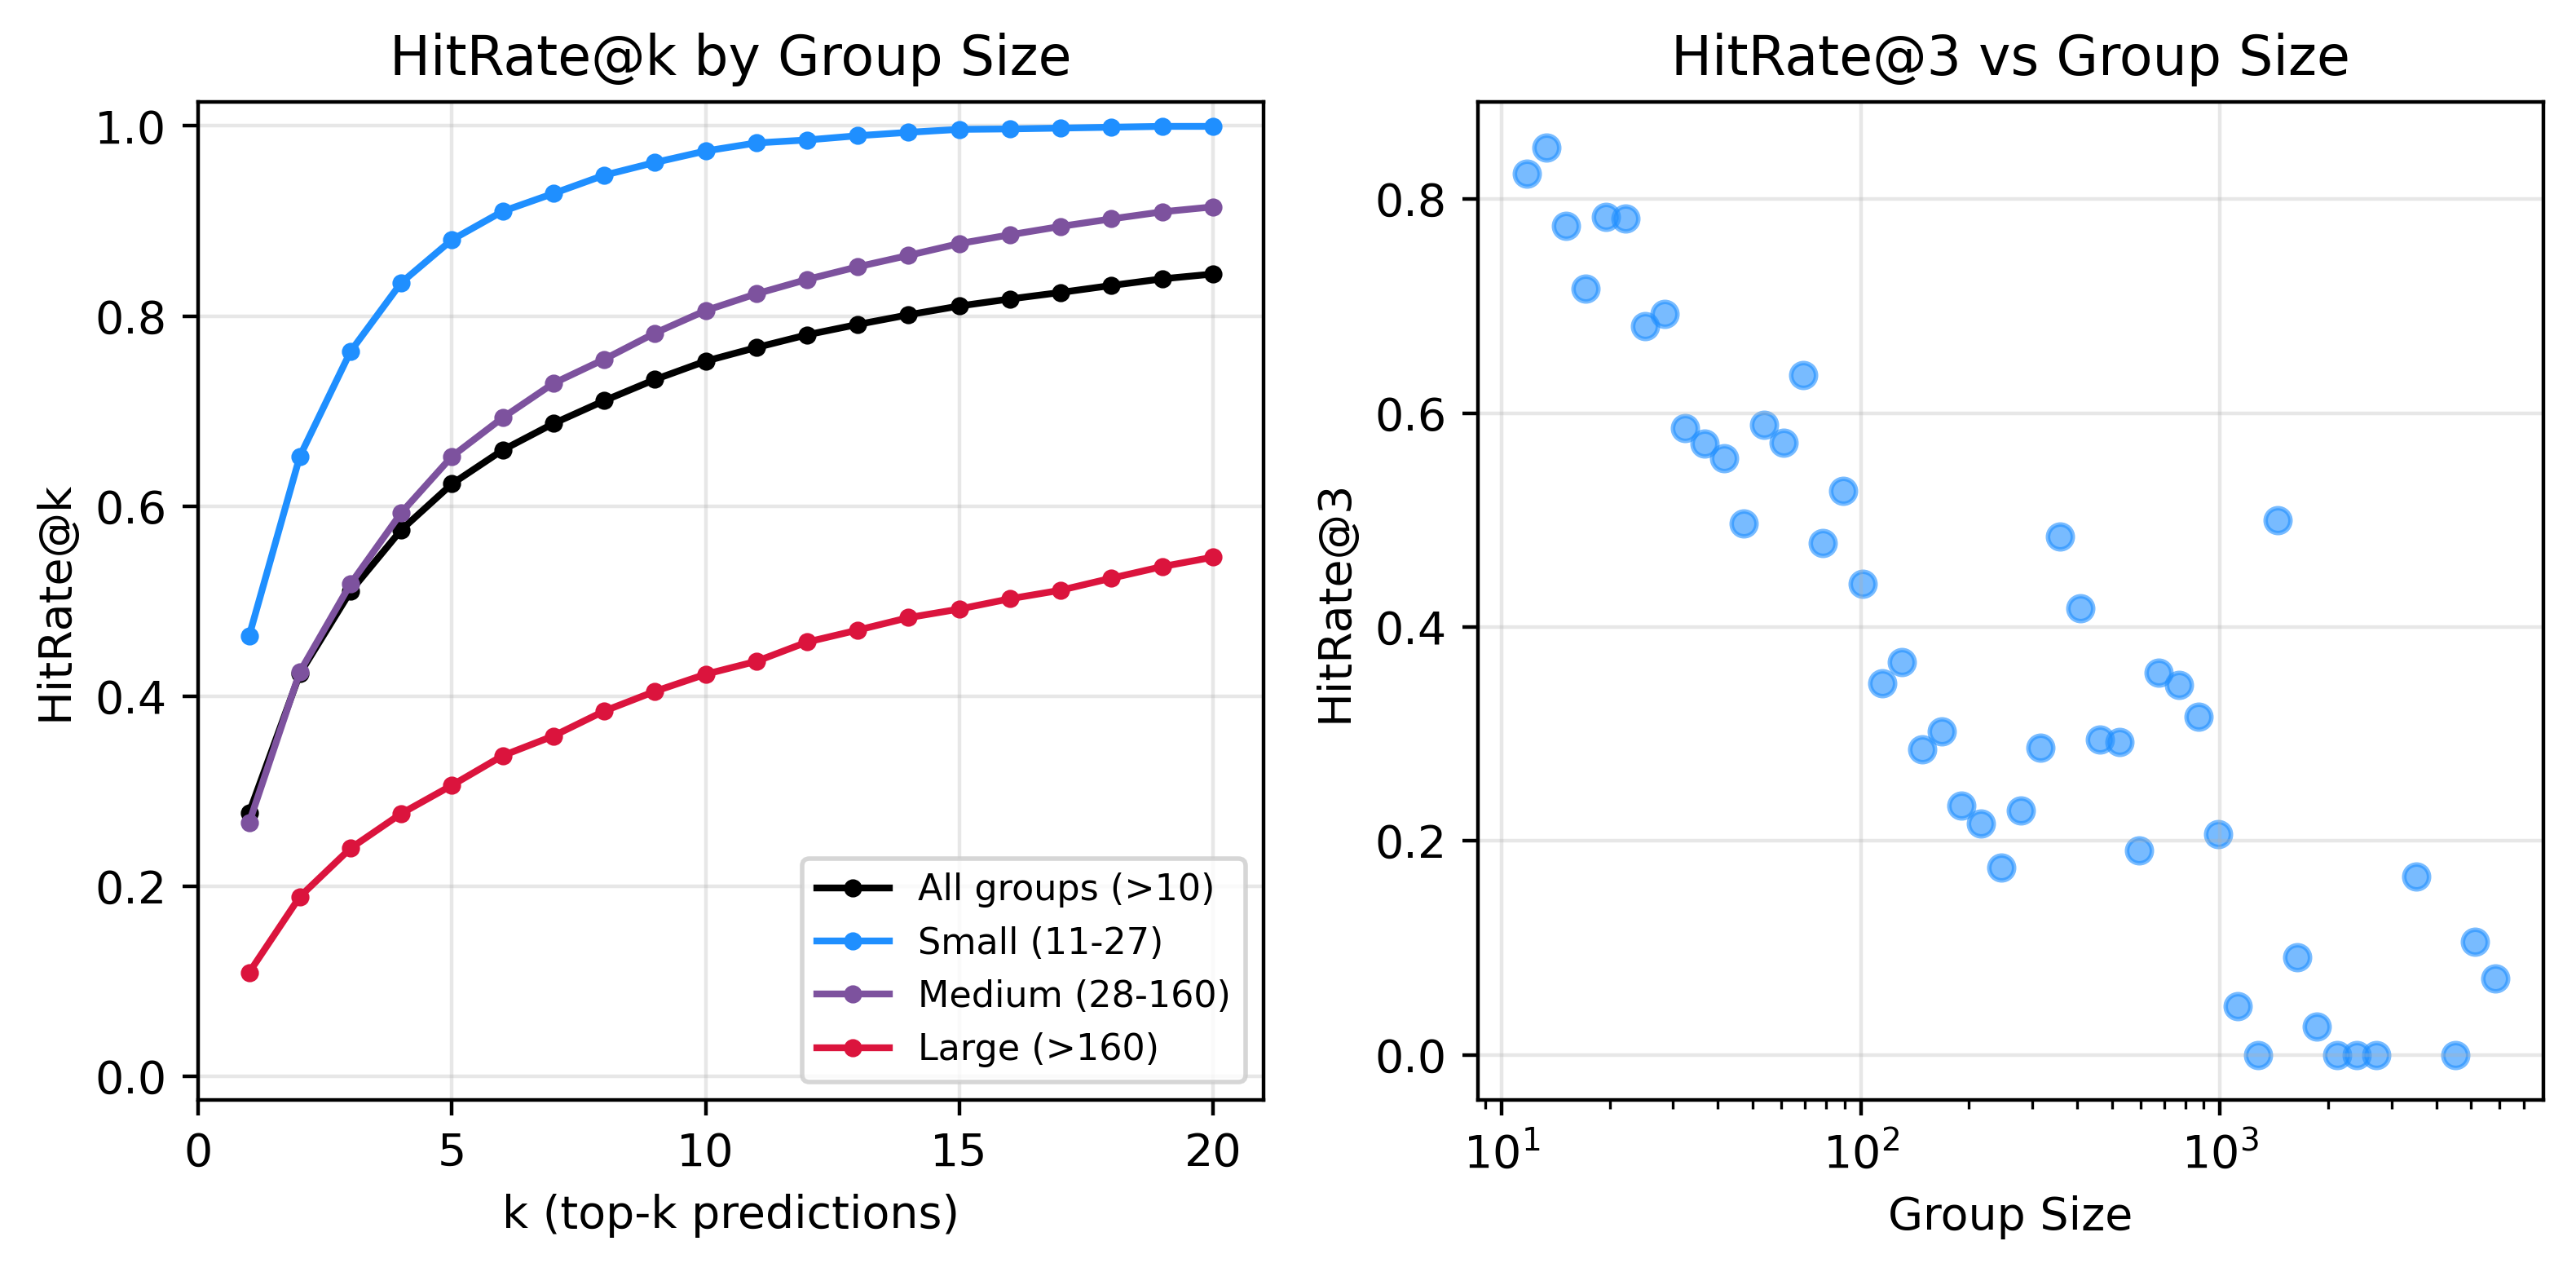

In [15]:
# Color palette
red = (0.86, 0.08, 0.24)
blue = (0.12, 0.56, 1.0)

# Prepare data for analysis
va_df = pl.DataFrame({
    'ranker_id': groups_va.to_numpy().flatten(),
    'pred_score': xgb_va_preds,
    'selected': y_va.to_numpy().flatten()
})

# Add group size and filter
va_df = va_df.join(
    va_df.group_by('ranker_id').agg(pl.len().alias('group_size')), 
    on='ranker_id'
).filter(pl.col('group_size') > 10)

# Calculate group size quantiles
size_quantiles = va_df.select('ranker_id', 'group_size').unique().select(
    pl.col('group_size').quantile(0.25).alias('q25'),
    pl.col('group_size').quantile(0.50).alias('q50'),
    pl.col('group_size').quantile(0.75).alias('q75')
).to_dicts()[0]

# Function to calculate hitrate curve efficiently
def calculate_hitrate_curve(df, k_values):
    # Sort once and calculate all k values
    sorted_df = df.sort(["ranker_id", "pred_score"], descending=[False, True])
    return [
        sorted_df.group_by("ranker_id", maintain_order=True)
        .head(k)
        .group_by("ranker_id")
        .agg(pl.col("selected").max().alias("hit"))
        .select(pl.col("hit").mean())
        .item()
        for k in k_values
    ]

# Calculate curves
k_values = list(range(1, 21))
curves = {
    'All groups (>10)': calculate_hitrate_curve(va_df, k_values),
    f'Small (11-{int(size_quantiles["q25"])})': calculate_hitrate_curve(
        va_df.filter(pl.col('group_size') <= size_quantiles['q25']), k_values
    ),
    f'Medium ({int(size_quantiles["q25"]+1)}-{int(size_quantiles["q75"])})': calculate_hitrate_curve(
        va_df.filter((pl.col('group_size') > size_quantiles['q25']) & 
                    (pl.col('group_size') <= size_quantiles['q75'])), k_values
    ),
    f'Large (>{int(size_quantiles["q75"])})': calculate_hitrate_curve(
        va_df.filter(pl.col('group_size') > size_quantiles['q75']), k_values
    )
}

# Calculate hitrate@3 by group size using log-scale bins
# Create log-scale bins
min_size = va_df['group_size'].min()
max_size = va_df['group_size'].max()
bins = np.logspace(np.log10(min_size), np.log10(max_size), 51)  # 51 edges = 50 bins

# Calculate hitrate@3 for each ranker_id
ranker_hr3 = (
    va_df.sort(["ranker_id", "pred_score"], descending=[False, True])
    .group_by("ranker_id", maintain_order=True)
    .agg([
        pl.col("selected").head(3).max().alias("hit_top3"),
        pl.col("group_size").first()
    ])
)

# Assign bins and calculate hitrate per bin
bin_centers = (bins[:-1] + bins[1:]) / 2  # Geometric mean would be more accurate for log scale
bin_indices = np.digitize(ranker_hr3['group_size'].to_numpy(), bins) - 1

size_analysis = pl.DataFrame({
    'bin_idx': bin_indices,
    'bin_center': bin_centers[np.clip(bin_indices, 0, len(bin_centers)-1)],
    'hit_top3': ranker_hr3['hit_top3']
}).group_by(['bin_idx', 'bin_center']).agg([
    pl.col('hit_top3').mean().alias('hitrate3'),
    pl.len().alias('n_groups')
]).filter(pl.col('n_groups') >= 3).sort('bin_center')  # At least 3 groups per bin

# Create combined figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), dpi=400)

# Left plot: HitRate@k curves
# Create color gradient from blue to red for size groups
colors = ['black']  # All groups is black
for i in range(3):  # 3 size groups
    t = i / 2  # 0, 0.5, 1
    color = tuple(blue[j] * (1 - t) + red[j] * t for j in range(3))
    colors.append(color)

for (label, hitrates), color in zip(curves.items(), colors):
    ax1.plot(k_values, hitrates, marker='o', label=label, color=color, markersize=3)
ax1.set_xlabel('k (top-k predictions)')
ax1.set_ylabel('HitRate@k')
ax1.set_title('HitRate@k by Group Size')
ax1.legend(fontsize=8)
ax1.grid(True, alpha=0.3)
ax1.set_xlim(0, 21)
ax1.set_ylim(-0.025, 1.025)

# Right plot: HitRate@3 vs Group Size (log scale)
ax2.scatter(size_analysis['bin_center'], size_analysis['hitrate3'], s=30, alpha=0.6, color=blue)
ax2.set_xlabel('Group Size')
ax2.set_ylabel('HitRate@3')
ax2.set_title('HitRate@3 vs Group Size')
ax2.set_xscale('log')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**HitRate@k Curves**

This graph, on the left, shows the model's recall at different ranks. Each line represents the model's performance on a specific subset of the validation data, categorized by the number of flights in each search session (the "group size"). The y-axis (HitRate@k) tells us the percentage of sessions where the correct flight was found within the top k predictions.

**Here's a breakdown of the results:**

- **Small Groups (blue line):** The model performs exceptionally well on searches with a small number of flights (11-27). The hit rate climbs very quickly, reaching a high of nearly 100% by the time we consider the top 20 results. This is expected, as there are fewer choices, making it easier for the model to find the correct one.

- **Medium Groups (purple line):** The performance on medium-sized groups (28-160) is still strong, but not as high as with small groups. The curve rises steadily, showing that as the complexity of the search increases, the model's task becomes more difficult.

- **All Groups (black line):** This line represents the overall performance, including all group sizes. It's a good summary of the model's average performance. The fact that it's positioned between the small and medium groups makes sense, as it's an average of these and other group sizes.

- **Large Groups (red line):** The model's performance on large groups (over 160 flights) is the weakest. The curve rises slowly, indicating that it struggles to place the correct flight in the top ranks when there are a huge number of options. This is a common challenge for ranking models, as the signal can get lost in the noise of many irrelevant options.

This visualization highlights a key finding: the model's performance is highly dependent on the complexity of the search query, as measured by group size.

**The HitRate@3 vs. Group Size Scatter Plot**

This graph, on the right, provides a more granular view of the model's performance. Each dot represents a bin of search sessions, showing the average HitRate@3 for that group size.

- **Group Size and Performance:** The plot shows a clear negative correlation: as the group size (x-axis) increases, the HitRate@3 (y-axis) generally decreases. This confirms the conclusion from the HitRate@k curves - the model is less accurate when faced with a larger number of choices.

- **Logarithmic Scale:** The use of a log scale on the x-axis is critical here. It allows us to visualize a wide range of group sizes, from 10 to over 1000, without the smaller values being squashed together. This reveals that the most significant drop in performance occurs as the group size moves from small to medium.

This analysis is valuable because it moves beyond a single, aggregated metric and provides actionable insights. It shows that future efforts to improve the model should focus on enhancing its ability to handle very large and complex search queries, possibly by creating new features or fine-tuning the model's parameters for those specific cases.

In [16]:
# Summary
print(f"HitRate@1: {curves['All groups (>10)'][0]:.3f}")
print(f"HitRate@3: {curves['All groups (>10)'][2]:.3f}")
print(f"HitRate@5: {curves['All groups (>10)'][4]:.3f}")
print(f"HitRate@10: {curves['All groups (>10)'][9]:.3f}")

HitRate@1: 0.277
HitRate@3: 0.510
HitRate@5: 0.623
HitRate@10: 0.753


The printed above shows the model's HitRate@k for all search groups with more than 10 flights. This directly relates to the HitRate@k Curves visualization described in the Canvas, giving us a quantitative summary of the black "All groups" line in that graph.

Here's a breakdown of what each value means:

- **HitRate@1: 0.277:** This indicates that in approximately 28% of all flight searches, the model successfully ranked the chosen flight as the top result. This is a strong starting point for a recommender system.
- **HitRate@3: 0.510:** This is the key metric for the project. A value of over 0.5 means the model placed the correct flight within the top three recommendations in just over half of the search sessions.
- **HitRate@5: 0.623:** By expanding the recommendation list to the top five, the model's success rate increases to over 62%, showing its ability to keep the correct flight close to the top.
- **HitRate@10: 0.753:** When we look at the top ten recommendations, the model finds the correct flight over 75% of the time.

In summary, these results demonstrate that the model's recall steadily improves as the list of recommendations gets longer. The increasing hit rate confirms that even if the chosen flight isn't at the very top, it's likely to be found in the first few recommendations. These numbers validate the model's effectiveness and provide clear metrics to track future improvements.

## Submission

This final part of the pipeline performs the inference and submission process for the machine learning competition follow requirement of the competitions It takes the trained XGBoost model and applies it to the unseen test data to generate the final predictions.

The process is as follows:

- **Prediction:** The `xgb_model.predict(dtest)` function uses the trained model to generate a numerical prediction score for each flight in the test set.
- **Group-wise Ranking:** The code then uses the Polars library to rank the predictions within each unique search session. The `rank(method='ordinal', descending=True).over('ranker_id')` operation is critical. It ensures that the highest-scoring flight in a search session gets a rank of 1, the second-highest gets a rank of 2, and so on. This is a direct application of the learning to rank concept, where the model's output scores are converted into a meaningful rank for each item within its group.
- **Output Generation:** Finally, the code creates a new DataFrame with the required columns (`Id, ranker_id`, and the newly calculated selected rank) and saves it as `submission.csv`. This file adheres to the specific format required for submission to the competition, allowing the model's performance on the hidden test set to be evaluated.

This step demonstrates the end-to-end functionality of the machine learning pipeline, from data preparation and model training to generating the final, ranked predictions.

In [18]:
submission_xgb = (
    test.select(['Id', 'ranker_id'])
    .with_columns(pl.Series('pred_score', xgb_model.predict(dtest)))
    .with_columns(
        pl.col('pred_score')
        .rank(method='ordinal', descending=True)
        .over('ranker_id')
        .cast(pl.Int32)
        .alias('selected')
    )
    .select(['Id', 'ranker_id', 'selected'])
)
submission_xgb.write_csv('submission.csv')
print("Done")

Done
